In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv(r"C:\personel projects\END TO END PROJECT\notebook\data\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns='math_score',axis='1')

In [7]:
y=df['math_score']

In [ ]:


print(f"categorical features in the dataset :{df.select_dtypes(include=['object']).columns.to_list()}") 
print(f"numrical features in the dataset :{df.select_dtypes(exclude=['object']).columns.to_list()}") 

categorical features in the dataset :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numrical features in the dataset :['math_score', 'reading_score', 'writing_score']


In [12]:
# create pipelines with transformer
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scaler=StandardScaler()
labeling=OneHotEncoder()
preprocessor =ColumnTransformer(

    [
        ('onehotencoder',labeling,cat_features),
        ('standardscaler',scaler,num_features)
    ]
)




In [16]:
X=preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [18]:
#seaparate dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [24]:
# evaluation function
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scores=r2_score(true,predicted)
    return mae,mse,rmse,r2_scores

In [26]:
# Define your models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regressor': SVR()
}

# Lists to store model names and their R² scores for comparison
model_names = []
r2_scores = []

# Loop through each model and evaluate its performance
for model_name, model_instance in models.items():
    print(f"Evaluating: {model_name}")

    # Train the model
    model_instance.fit(X_train, y_train)

    # Make predictions
    predictions_train = model_instance.predict(X_train)
    predictions_test = model_instance.predict(X_test)

    # Evaluate performance using your custom function
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, predictions_train)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, predictions_test)

    # Store results
    model_names.append(model_name)
    r2_scores.append(test_r2)

    # Display training performance
    print("Training Performance:")
    print(f"  MAE  : {train_mae:.4f}")
    print(f"  MSE  : {train_mse:.4f}")
    print(f"  RMSE : {train_rmse:.4f}")
    print(f"  R²   : {train_r2:.4f}")

    # Display testing performance
    print("Testing Performance:")
    print(f"  MAE  : {test_mae:.4f}")
    print(f"  MSE  : {test_mse:.4f}")
    print(f"  RMSE : {test_rmse:.4f}")
    print(f"  R²   : {test_r2:.4f}")

    print("-" * 50 + "\n")


Evaluating: Linear Regression
Training Performance:
  MAE  : 4.2667
  MSE  : 28.3349
  RMSE : 5.3231
  R²   : 0.8743
Testing Performance:
  MAE  : 4.2148
  MSE  : 29.0952
  RMSE : 5.3940
  R²   : 0.8804
--------------------------------------------------

Evaluating: Lasso
Training Performance:
  MAE  : 5.2063
  MSE  : 43.4784
  RMSE : 6.5938
  R²   : 0.8071
Testing Performance:
  MAE  : 5.1579
  MSE  : 42.5064
  RMSE : 6.5197
  R²   : 0.8253
--------------------------------------------------

Evaluating: Ridge
Training Performance:
  MAE  : 4.2650
  MSE  : 28.3378
  RMSE : 5.3233
  R²   : 0.8743
Testing Performance:
  MAE  : 4.2111
  MSE  : 29.0563
  RMSE : 5.3904
  R²   : 0.8806
--------------------------------------------------

Evaluating: K-Nearest Neighbors
Training Performance:
  MAE  : 4.5167
  MSE  : 32.5776
  RMSE : 5.7077
  R²   : 0.8555
Testing Performance:
  MAE  : 5.6210
  MSE  : 52.6066
  RMSE : 7.2530
  R²   : 0.7838
--------------------------------------------------

Ev

In [27]:

print("Final Leaderboard (Test R² Scores):")
for name, score in sorted(zip(model_names, r2_scores), key=lambda x: x[1], reverse=True):
    print(f"{name:<25} → R² Score: {score:.4f}")


Final Leaderboard (Test R² Scores):
Ridge                     → R² Score: 0.8806
Linear Regression         → R² Score: 0.8804
Random Forest             → R² Score: 0.8521
CatBoost                  → R² Score: 0.8516
AdaBoost                  → R² Score: 0.8488
XGBoost                   → R² Score: 0.8278
Lasso                     → R² Score: 0.8253
K-Nearest Neighbors       → R² Score: 0.7838
Decision Tree             → R² Score: 0.7498
Support Vector Regressor  → R² Score: 0.7286


In [29]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model %.2f" %score)

accuracy of the model 88.04


Text(0, 0.5, 'predicted')

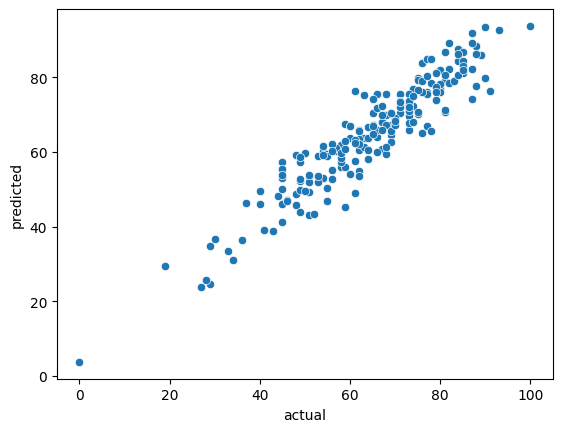

In [33]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

Text(0, 0.5, 'predicted')

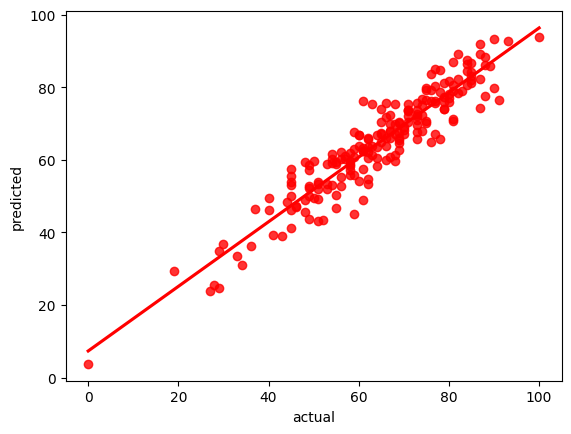

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('actual')
plt.ylabel('predicted')

In [38]:
pred_df=pd.DataFrame({'actual value':y_test,'predicted_value':y_pred,'difference':y_pred-y_test})
pred_df

,actual value,predicted_value,difference
521,91,76.387970,-14.612030
737,53,58.885970,5.885970
740,80,76.990265,-3.009735
660,74,76.851804,2.851804
411,84,87.627378,3.627378
...,...,...,...
408,52,43.409149,-8.590851
332,62,62.152214,0.152214
208,74,67.888395,-6.111605
613,65,67.022287,2.022287
